Libraries 


In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm


In [19]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score
import numpy as np
from random import seed
import random

In [20]:
#Creating Data
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)

#Dividing Data
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

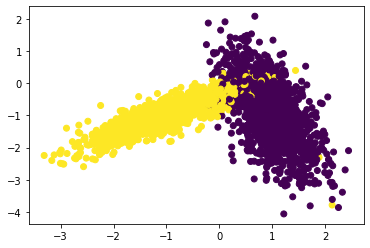

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [22]:
def RandomSearchCV(x_train,y_train,classifier, param_range, fold):
    trainingscores = []
    testingscores  = []    
    global param
    param=[]
    seed(7)
    param= random.sample(range(param_range[0],param_range[1]), 10) # Set Of Random unique Numbers 
    param.sort() 
    print(param)
    length = int(len(x_train)/fold) 
    foldsX = []
    foldsY = []
    for k in range(fold-1):

        foldsX += [x_train[k*length:(k+1)*length]]

        foldsY += [y_train[k*length:(k+1)*length]]  
              
    foldsX += [x_train[(folds-1)*length:len(x_train)]]

    foldsY += [y_train[(folds-1)*length:len(y_train)]]

    for l in tqdm(param):

        trainingscores_folds = []

        testingscores_folds  = []

        for j in range(0, folds):
            X_test  = foldsX[j]
            Y_test  = foldsY[j]

            G=np.delete(foldsX,j,0)      #removing cross validation data 
            V=np.delete(foldsY,j,0)

            X_train = np.concatenate(G)
            Y_train =  np.concatenate(V)  #data used for training
            
            classifier.n_neighbors = l
            classifier.fit(X_train,Y_train) 
            
            Y_predicted = classifier.predict(X_test)
            testingscores_folds.append(accuracy_score(Y_test, Y_predicted)) # calculating accuracy score for each fold
            
            Y_predicted = classifier.predict(X_train)
            trainingscores_folds.append(accuracy_score(Y_train, Y_predicted))

        trainingscores.append(np.mean(np.array(trainingscores_folds)))
        testingscores.append(np.mean(np.array(testingscores_folds))) # calculating the accuracy score for each k
        
    return trainingscores,testingscores   

[2, 3, 4, 5, 11, 12, 13, 18, 19, 21]


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


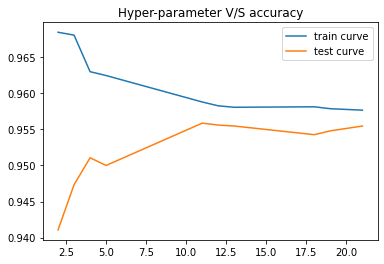

-------------------------------
[2, 3, 4, 5, 11, 12, 13, 18, 19, 21]


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings

warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()
param_range=(1,30)
folds = 3
trainingscores,testingscores = RandomSearchCV(X_train,y_train,neigh, param_range, folds) # calling the function
plt.plot(param,trainingscores, label='train curve')
plt.plot(param,testingscores, label='test curve')
plt.title('Hyper-parameter V/S accuracy')
plt.legend()
plt.show()
print("-------------------------------")
print(param)

In [24]:
def plot_decision_boundary(X1, X2, y, clf):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

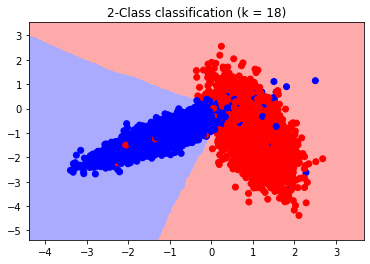

In [25]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 18)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)